1 Day 10

In [1]:
%cd ..
from inspect import cleandoc
import ipytest
ipytest.autoconfig()

/home/vagrant/Development/advent-of-code-2022/python


In [2]:
from aocd import get_data
data = get_data(year=2022, day=10)

In [3]:
example1 = cleandoc("""
    noop
    addx 3
    addx -5
    """)

example2 = cleandoc("""
    addx 15
    addx -11
    addx 6
    addx -3
    addx 5
    addx -1
    addx -8
    addx 13
    addx 4
    noop
    addx -1
    addx 5
    addx -1
    addx 5
    addx -1
    addx 5
    addx -1
    addx 5
    addx -1
    addx -35
    addx 1
    addx 24
    addx -19
    addx 1
    addx 16
    addx -11
    noop
    noop
    addx 21
    addx -15
    noop
    noop
    addx -3
    addx 9
    addx 1
    addx -3
    addx 8
    addx 1
    addx 5
    noop
    noop
    noop
    noop
    noop
    addx -36
    noop
    addx 1
    addx 7
    noop
    noop
    noop
    addx 2
    addx 6
    noop
    noop
    noop
    noop
    noop
    addx 1
    noop
    noop
    addx 7
    addx 1
    noop
    addx -13
    addx 13
    addx 7
    noop
    addx 1
    addx -33
    noop
    noop
    noop
    addx 2
    noop
    noop
    noop
    addx 8
    noop
    addx -1
    addx 2
    addx 1
    noop
    addx 17
    addx -9
    addx 1
    addx 1
    addx -3
    addx 11
    noop
    noop
    addx 1
    noop
    addx 1
    noop
    noop
    addx -13
    addx -19
    addx 1
    addx 3
    addx 26
    addx -30
    addx 12
    addx -1
    addx 3
    addx 1
    noop
    noop
    noop
    addx -9
    addx 18
    addx 1
    addx 2
    noop
    noop
    addx 9
    noop
    noop
    noop
    addx -1
    addx 2
    addx -37
    addx 1
    addx 3
    noop
    addx 15
    addx -21
    addx 22
    addx -6
    addx 1
    noop
    addx 2
    addx 1
    noop
    addx -10
    noop
    noop
    addx 20
    addx 1
    addx 2
    addx 2
    addx -6
    addx -11
    noop
    noop
    noop
    """)

In [10]:
from dataclasses import dataclass
from enum import Enum, auto
from typing import Self
from parsec import eof, generate, digit, many, string, many1, optional, space


class InstructionType(Enum):
    ADDX = auto()
    NOOP = auto()

@dataclass
class Instruction:
    t: InstructionType
    arg: int|None = None
    
    @classmethod
    def noop(cls) -> Self:
        return cls(InstructionType.NOOP)
    
    @classmethod
    def parse(cls, text: str) -> Self:
        return ((noop ^ addx) << eof()).parse(text)
    
    def apply(self, x: int) -> tuple[int, int]:
        match self.t:
            case InstructionType.NOOP:
                return (x, 1)
            case InstructionType.ADDX:
                return (x + self.arg, 2)

@dataclass
class Program:
    instructions: list[Instruction]
    
    @classmethod
    def parse(cls, text: str) -> Self:
        return cls(list(map(Instruction.parse, text.splitlines())))
    
    def run(self) -> list[int]:
        xs = [1]
        
        for i, instruction in enumerate(self.instructions):
            new_x, count = instruction.apply(xs[-1])
            if count == 2:
                xs += [xs[-1], new_x]
            else:
                xs += [new_x]

        return xs

    def signal_strength_sum(self) -> int:
        signal_strengths = [
            (i+1) * x
            for i, x in enumerate(self.run())
        ]

        return sum(signal_strengths[19::40])

    def render_image(self) -> list[list[int]]:
        xs = self.run()
        return [
            [
                int(xs[j*40+i] in [i-1, i, i+1])
                for i in range(40)
            ]
            for j in range(6)
        ]

@generate
def addx():
    yield string("addx")
    yield space()
    sign = yield optional(string("-"), "")
    digits = yield many1(digit())
    
    return Instruction(InstructionType.ADDX, int("".join([sign]+digits)))

noop = string("noop").parsecmap(lambda _: Instruction.noop())

In [11]:
program1 = Program.parse(example1)

In [13]:
%%ipytest
import pytest

def test_example1():
    expected = [1, 1, 1, 4, 4, -1]
    assert expected == Program.parse(example1).run()
    
@pytest.fixture
def xs2():
    return Program.parse(example2).run()

@pytest.mark.parametrize("cycle, expected", [
    (20, 21),
    (60, 19),
    (100, 18),
    (140, 21),
    (180, 16),
    (220, 18),
])
def test_example2(cycle: int, expected: int, xs2):
    assert expected == xs2[cycle-1]

def test_render_image():
    text = cleandoc("""
        ##..##..##..##..##..##..##..##..##..##..
        ###...###...###...###...###...###...###.
        ####....####....####....####....####....
        #####.....#####.....#####.....#####.....
        ######......######......######......####
        #######.......#######.......#######.....
        """)
    expected = [
        [int(c == "#") for c in line]
        for line in text.splitlines()
    ]
    
    assert expected == Program.parse(example2).render_image()

........                                                                                     [100%]
8 passed in 0.06s


In [ ]:
Program.parse(example2).signal_strength_sum()

In [ ]:
Program.parse(data).signal_strength_sum()

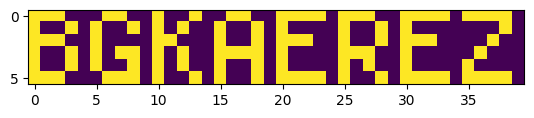

In [23]:
from matplotlib import pyplot

pyplot.imshow(Program.parse(data).render_image())